In [12]:
# importing libreries and changing their name

import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [13]:
# read the excel file
csv_path = "AXS_USD_Coinbase_day_2022-09-30.csv"
df = pd.read_csv(csv_path, parse_dates=['Date'])
df = df.sort_values('Date')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-07-01,29.730000,29.809999,29.200001,29.639999,21.302589,1158900
1,2010-07-02,29.889999,29.969999,29.450001,29.570000,21.252270,471000
2,2010-07-06,30.110001,30.110001,29.320000,29.540001,21.230717,726600
3,2010-07-07,29.620001,30.760000,29.590000,30.750000,22.100357,911900
4,2010-07-08,31.160000,31.200001,30.780001,31.040001,22.308781,638900


In [14]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3085.000000,3085.000000,3085.000000,3085.000000,3085.000000,3.085000e+03
mean,48.769339,49.207122,48.333796,48.777669,41.677069,6.738083e+05
std,10.232932,10.282053,10.184220,10.230636,10.983898,4.005729e+05
min,25.100000,25.559999,24.799999,25.309999,18.691307,5.970000e+04
25%,41.400002,41.799999,40.900002,41.470001,33.897461,4.071000e+05
50%,51.150002,51.630001,50.610001,51.130001,44.552818,5.787000e+05
75%,55.980000,56.540001,55.509998,55.990002,50.474487,8.325000e+05
max,70.820000,71.059998,70.180000,70.919998,60.348656,7.554900e+06


In [16]:
df=df.set_index('Date')
df.index

DatetimeIndex(['2010-07-01', '2010-07-02', '2010-07-06', '2010-07-07',
               '2010-07-08', '2010-07-09', '2010-07-12', '2010-07-13',
               '2010-07-14', '2010-07-15',
               ...
               '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22',
               '2022-09-23', '2022-09-26', '2022-09-27', '2022-09-28',
               '2022-09-29', '2022-09-30'],
              dtype='datetime64[ns]', name='Date', length=3085, freq=None)

In [19]:
y = df['Adj Close'].resample('MS').mean()
y['2010':]

Date
2010-07-01    22.388525
2010-08-01    22.293427
2010-09-01    23.233723
2010-10-01    24.515683
2010-11-01    25.624802
                ...    
2022-05-01    56.237813
2022-06-01    55.663352
2022-07-01    53.274527
2022-08-01    52.217313
2022-09-01    52.169722
Freq: MS, Name: Adj Close, Length: 147, dtype: float64

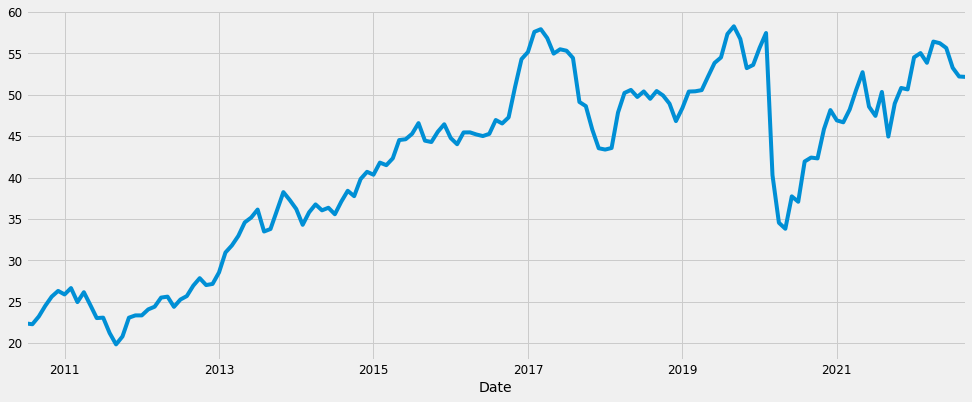

In [20]:
y.plot(figsize = (15, 6))
plt.show()

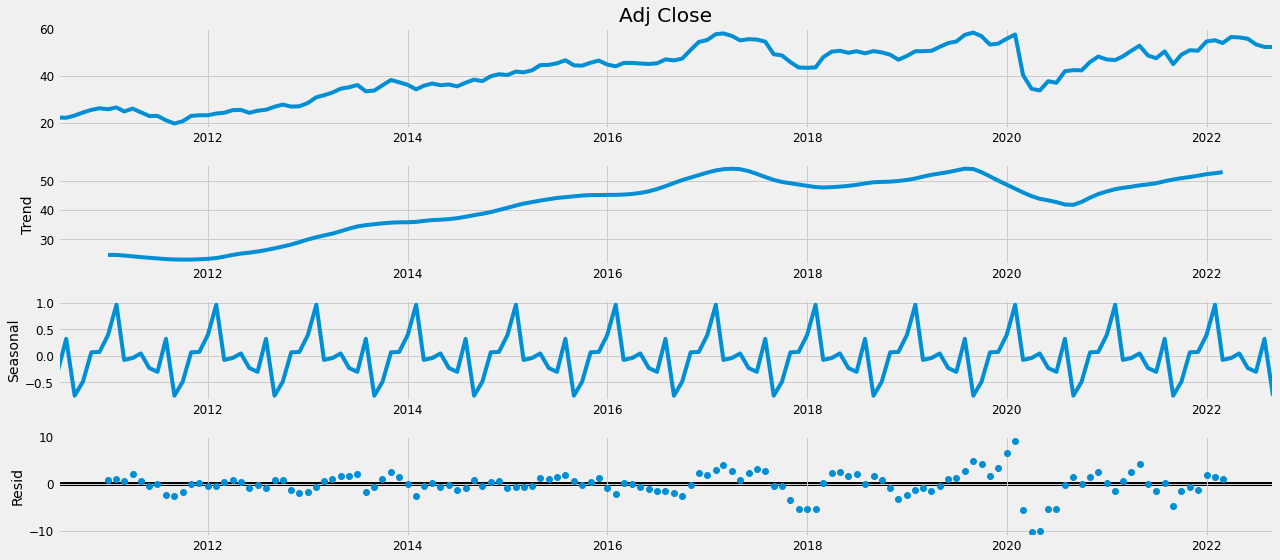

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(y, model = 'additive')
fig = decomposition.plot()
plt.show()

In [22]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1525.5688090100448
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1382.140496568053
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:933.0460040520612
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:929.3070759976163
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1057.5207278414728
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1053.7918072414186
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:927.3606108542449
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:926.9897140438405
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1336.5902791232334
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1197.7027736157684
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:812.7821712729678
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:804.8538630423145
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:922.4887598041914
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:914.4816829213798
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:803.1295141002629
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:805.002987239556
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:659.1786214975002
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:660.7021300261156
ARIMA(

In [24]:
#Fitting the ARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(y, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0301      0.576     -0.052      0.958      -1.160       1.100
ma.L1          0.2647      0.564      0.469      0.639      -0.841       1.370
ar.S.L12      -0.4749      0.043    -11.100      0.000      -0.559      -0.391
sigma2         8.4013      0.376     22.351      0.000       7.665       9.138


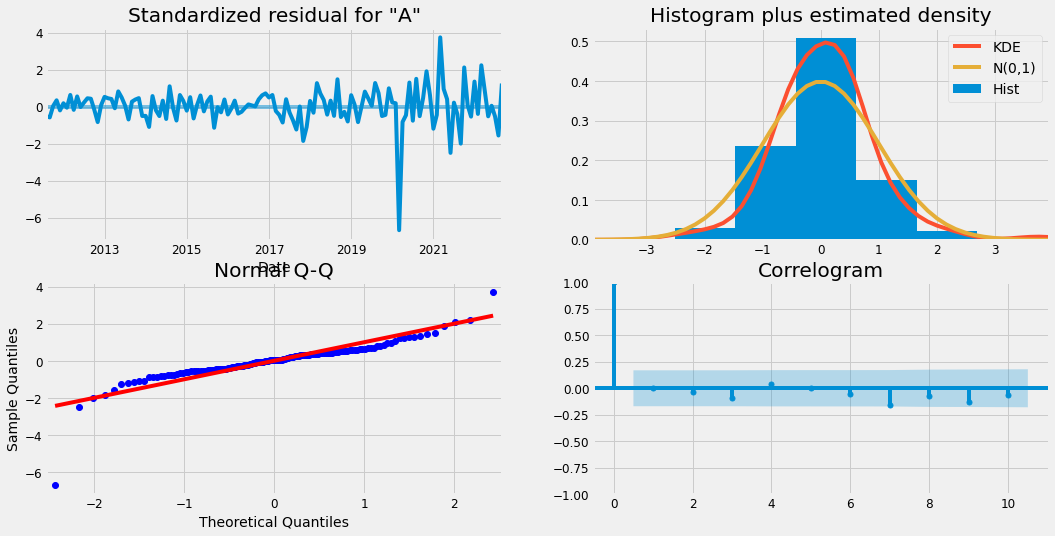

In [25]:
#run model diagnostic to investigate any unusual behavior
result.plot_diagnostics(figsize = (16, 8))
plt.show()

In [26]:
prediction = result.get_prediction(start = pd.to_datetime('2010-07-01'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Adj Close,upper Adj Close
Date,,
2010-07-01,-2771.815579,2771.815579
2010-08-01,-1937.586647,1982.363753
2010-09-01,-1937.681774,1982.268626
2010-10-01,-1936.741475,1983.208925
2010-11-01,-1935.459513,1984.490887
...,...,...
2022-05-01,52.083112,63.445016
2022-06-01,49.852671,61.214576
2022-07-01,49.130450,60.492354


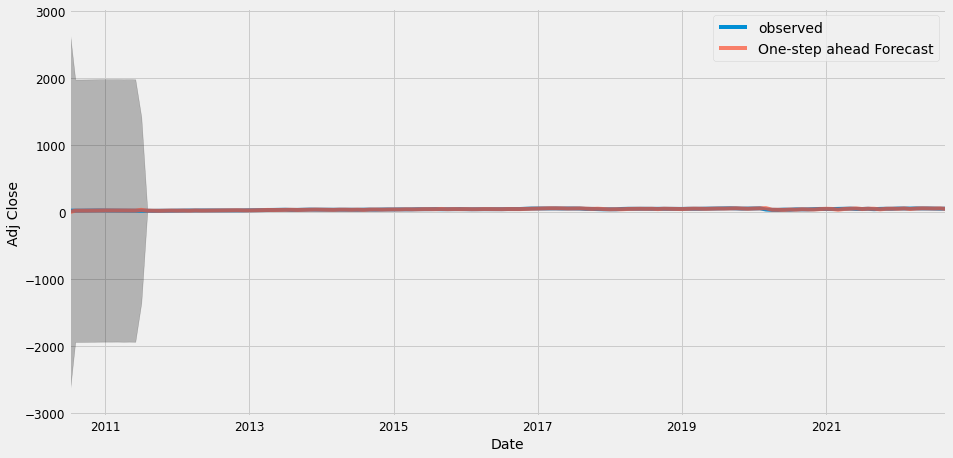

In [57]:
#Visualize the forecasting
ax = y['2010':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = .25)
ax.set_xlabel("Date")
ax.set_ylabel('Adj Close')
plt.legend()
plt.show()

In [32]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)
y_hat = prediction.predicted_mean
y_truth = y['2010-07-01':]

mse = ((y_hat - y_truth) ** 2).mean()
rmse = np.sqrt(mse)
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Mean Squared Error of our forecasts is 12.04
The Root Mean Squared Error of our forecasts is 3.47


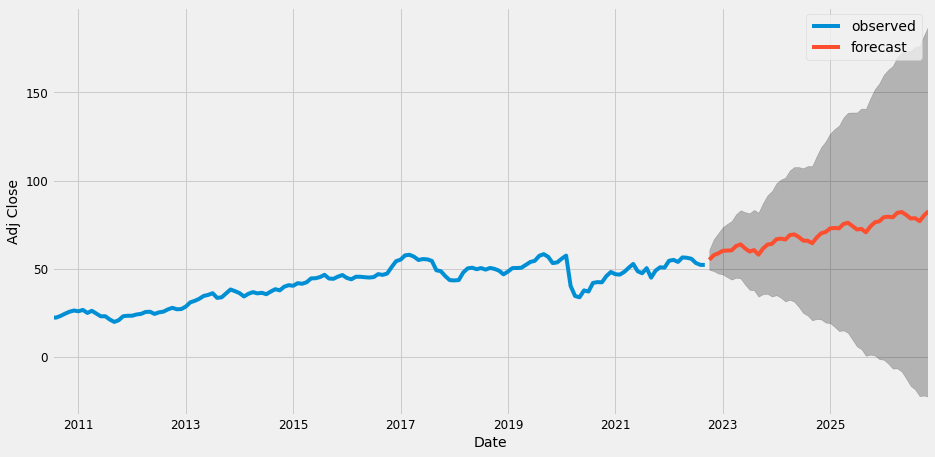

In [58]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 50)
pred_ci = pred_uc.conf_int()

ax = y.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Adj Close')

plt.legend()
plt.show()